# Reading data and time data in Pandas

In [4]:
import pandas as pd

rides = pd.read_csv('data/capital-onebike.csv', parse_dates=['Start date', 'End date'])
print(rides.head(3))

           Start date            End date  Start station number  \
0 2017-10-01 15:23:25 2017-10-01 15:26:26                 31038   
1 2017-10-01 15:42:57 2017-10-01 17:49:59                 31036   
2 2017-10-02 06:37:10 2017-10-02 06:42:53                 31036   

                   Start station  End station number  \
0           Glebe Rd & 11th St N               31036   
1  George Mason Dr & Wilson Blvd               31036   
2  George Mason Dr & Wilson Blvd               31037   

                            End station Bike number Member type  
0         George Mason Dr & Wilson Blvd      W20529      Member  
1         George Mason Dr & Wilson Blvd      W20529      Casual  
2  Ballston Metro / N Stuart & 9th St N      W20529      Member  


In [7]:
rides['Duration'] = rides['End date'] - rides['Start date']

print(rides['Duration'].head(5))

0   0 days 00:03:01
1   0 days 02:07:02
2   0 days 00:05:43
3   0 days 00:21:18
4   0 days 00:21:17
Name: Duration, dtype: timedelta64[ns]


# Summarizing datetime data in Pandas

In [9]:
rides['Duration seconds'] = rides['Duration'].dt.total_seconds()

rides.groupby('Member type')['Duration seconds'].mean()

Member type
Casual    1994.666667
Member     992.279661
Name: Duration seconds, dtype: float64

In [10]:
rides.resample('ME', on = 'Start date')['Duration seconds'].mean()

Start date
2017-10-31    1886.453704
2017-11-30     854.174757
2017-12-31     635.101266
Freq: ME, Name: Duration seconds, dtype: float64

In [11]:
rides.groupby('Member type').size()

Member type
Casual     54
Member    236
dtype: int64

In [12]:
rides.groupby('Member type').first()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Duration,Duration seconds
Member type,,,,,,,,,
Casual,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,0 days 02:07:02,7622.0
Member,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,0 days 00:03:01,181.0


<Axes: xlabel='Start date'>

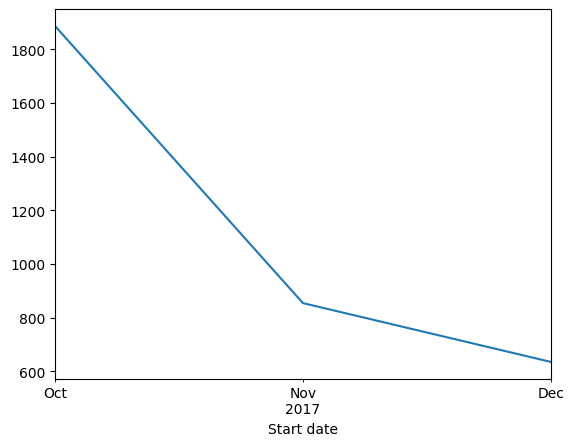

In [13]:
rides.resample('ME', on = 'Start date')['Duration seconds'].mean().plot()

<Axes: xlabel='Start date'>

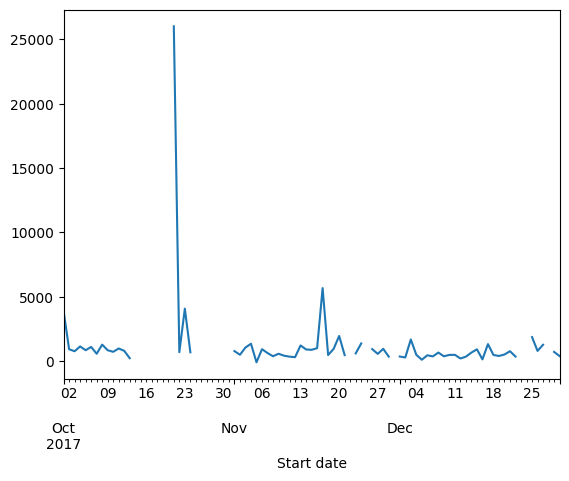

In [14]:
rides.resample('D', on = 'Start date')['Duration seconds'].mean().plot()

# Additional datetime methods in pandas

In [18]:
rides['Duration seconds'].min()

np.float64(-3346.0)

In [19]:
rides['Start date'].head(3).dt.tz_localize('America/New_york')

0   2017-10-01 15:23:25-04:00
1   2017-10-01 15:42:57-04:00
2   2017-10-02 06:37:10-04:00
Name: Start date, dtype: datetime64[ns, America/New_York]

In [20]:
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', ambiguous = 'NaT')
rides['End date'] = rides['End date'].dt.tz_localize('America/New_York', ambiguous = 'NaT')

In [21]:
rides['Duration'] = rides['End date'] - rides['Start date']